In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from src.visualization import plot_box_plot
from src.data_cleaning import remove_outliers_iqr
from scripts.load_data import load_data, columns

%matplotlib inline

In [51]:
# load the data
df = load_data()

df.head(10)

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
5,145247,12827,2015-01-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,3.256435,0.0
6,145247,12827,2015-04-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,50.474737,0.0
7,145247,12827,2015-06-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,35.332316,0.0
8,145247,12827,2015-08-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
9,145245,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,No excess,Passenger Liability,Passenger Liability,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,1.009474,0.0


In [52]:
df.describe()

,UnderwrittenCoverID,PolicyID,PostalCode,mmcode,RegistrationYear,Cylinders,cubiccapacity,kilowatts,NumberOfDoors,CustomValueEstimate,NumberOfVehiclesInFleet,SumInsured,CalculatedPremiumPerTerm,TotalPremium,TotalClaims
count,1.000098e+06,1.000098e+06,1.000098e+06,9.995460e+05,1.000098e+06,999546.000000,999546.000000,999546.000000,999546.000000,2.204560e+05,0.0,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06
mean,1.048175e+05,7.956682e+03,3.020601e+03,5.487770e+07,2.010225e+03,4.046642,2466.743258,97.207919,4.019250,2.255311e+05,NaN,6.041727e+05,1.178757e+02,6.190550e+01,6.486119e+01
std,6.329371e+04,5.290039e+03,2.649854e+03,1.360381e+07,3.261391e+00,0.294020,442.800640,19.393256,0.468314,5.645157e+05,NaN,1.508332e+06,3.997017e+02,2.302845e+02,2.384075e+03
min,1.000000e+00,1.400000e+01,1.000000e+00,4.041200e+06,1.987000e+03,0.000000,0.000000,0.000000,0.000000,2.000000e+04,NaN,1.000000e-02,0.000000e+00,-7.825768e+02,-1.200241e+04
25%,5.514300e+04,4.500000e+03,8.270000e+02,6.005692e+07,2.008000e+03,4.000000,2237.000000,75.000000,4.000000,1.350000e+05,NaN,5.000000e+03,3.224800e+00,0.000000e+00,0.000000e+00
50%,9.408300e+04,7.071000e+03,2.000000e+03,6.005842e+07,2.011000e+03,4.000000,2694.000000,111.000000,4.000000,2.200000e+05,NaN,7.500000e+03,8.436900e+00,2.178333e+00,0.000000e+00
75%,1.391900e+05,1.107700e+04,4.180000e+03,6.005842e+07,2.013000e+03,4.000000,2694.000000,111.000000,4.000000,2.800000e+05,NaN,2.500000e+05,9.000000e+01,2.192982e+01,0.000000e+00
max,3.011750e+05,2.324600e+04,9.870000e+03,6.506535e+07,2.015000e+03,10.000000,12880.000000,309.000000,6.000000,2.655000e+07,NaN,1.263620e+07,7.442217e+04,6.528260e+04,3.930921e+05


In [53]:
# citizenship has a lot of empty values that are considered as true values
# replace them with nan values
# also do this for all columns 
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               104888 non-null   object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

In [54]:
df.shape

(1000098, 52)

In [55]:
df.rename(columns={"mmcode": "MMCODE", "make": "Make", "cubiccapacity": "CubicCapacity", "kilowatts": "Kilowatts",
                   "bodytype": "BodyType"}, inplace=True)

In [56]:
df["TransactionMonth"] = pd.to_datetime(df[
                                            "TransactionMonth"]).dt.date  # TODO: why does the pd.to_datetime(column).dt.date give an object instead of a datetime
df["TransactionMonth"] = pd.to_datetime(df["TransactionMonth"])

In [57]:
df.dropna(subset=["MMCODE"], inplace=True)

In [58]:
df["CapitalOutstanding"] = df["CapitalOutstanding"].str.replace(",", "").astype(float)

In [59]:
df.dropna(subset=["CapitalOutstanding"], axis=0, inplace=True)

In [60]:
df.fillna({
    "Citizenship": df["Citizenship"].mode()[0],
    "WrittenOff": df["WrittenOff"].mode()[0],
    "Rebuilt": df["Rebuilt"].mode()[0],
    "Converted": df["Converted"].mode()[0],
    "CrossBorder": df["CrossBorder"].mode()[0],
    "Bank": df["Bank"].mode()[0],
    "AccountType": df["AccountType"].mode()[0],
    "MaritalStatus": df["MaritalStatus"].mode()[0],
    "Gender": df["Gender"].mode()[0],
    "CustomValueEstimate": 0,
    "NewVehicle": df["NewVehicle"].mode()[0],
}, inplace=True)

In [61]:
# drop the NumberOfVehiclesInFleet column since there are not a single value registered
df.drop(columns=["NumberOfVehiclesInFleet"], inplace=True)

In [62]:
df["Cylinders"] = df["Cylinders"].astype(int)
df["NumberOfDoors"] = df["Cylinders"].astype(int)

In [63]:
df["UnderwrittenCoverID"] = df["UnderwrittenCoverID"].astype(object)
df["PolicyID"] = df["PolicyID"].astype(object)
df["PostalCode"] = df["PostalCode"].astype(object)
df["MMCODE"] = df["MMCODE"].astype(object)
df["RegistrationYear"] = df["RegistrationYear"].astype(object)

In [64]:
df.dtypes

UnderwrittenCoverID                 object
PolicyID                            object
TransactionMonth            datetime64[ns]
IsVATRegistered                       bool
Citizenship                         object
LegalType                           object
Title                               object
Language                            object
Bank                                object
AccountType                         object
MaritalStatus                       object
Gender                              object
Country                             object
Province                            object
PostalCode                          object
MainCrestaZone                      object
SubCrestaZone                       object
ItemType                            object
MMCODE                              object
VehicleType                         object
RegistrationYear                    object
Make                                object
Model                               object
Cylinders  

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999544 entries, 0 to 1000097
Data columns (total 51 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   UnderwrittenCoverID       999544 non-null  object        
 1   PolicyID                  999544 non-null  object        
 2   TransactionMonth          999544 non-null  datetime64[ns]
 3   IsVATRegistered           999544 non-null  bool          
 4   Citizenship               999544 non-null  object        
 5   LegalType                 999544 non-null  object        
 6   Title                     999544 non-null  object        
 7   Language                  999544 non-null  object        
 8   Bank                      999544 non-null  object        
 9   AccountType               999544 non-null  object        
 10  MaritalStatus             999544 non-null  object        
 11  Gender                    999544 non-null  object        
 12  Countr

In [66]:
df.isna().sum()

UnderwrittenCoverID         0
PolicyID                    0
TransactionMonth            0
IsVATRegistered             0
Citizenship                 0
LegalType                   0
Title                       0
Language                    0
Bank                        0
AccountType                 0
MaritalStatus               0
Gender                      0
Country                     0
Province                    0
PostalCode                  0
MainCrestaZone              0
SubCrestaZone               0
ItemType                    0
MMCODE                      0
VehicleType                 0
RegistrationYear            0
Make                        0
Model                       0
Cylinders                   0
CubicCapacity               0
Kilowatts                   0
BodyType                    0
NumberOfDoors               0
VehicleIntroDate            0
CustomValueEstimate         0
AlarmImmobiliser            0
TrackingDevice              0
CapitalOutstanding          0
NewVehicle

In [67]:
vehicles_with_no_cylinders = np.unique(df[df["Cylinders"] == 0]["VehicleType"])
vehicles_with_no_cylinders

array(['Bus', 'Heavy Commercial', 'Medium Commercial'], dtype=object)

In [68]:
for vehicle in vehicles_with_no_cylinders:
    mode = df[(df["VehicleType"] == vehicle) & (df["Cylinders"] != 0)]["Cylinders"].mode()[0]
    df["Cylinders"] = np.where((df["VehicleType"] == vehicle) & (df["Cylinders"] == 0), mode, df["Cylinders"])

In [69]:
vehicles_with_no_doors = np.unique(df[df["NumberOfDoors"] == 0]["VehicleType"])
vehicles_with_no_doors

array(['Bus', 'Heavy Commercial', 'Medium Commercial'], dtype=object)

In [70]:
for vehicle in vehicles_with_no_doors:
    mode = df[(df["VehicleType"] == vehicle) & (df["NumberOfDoors"] != 0)]["NumberOfDoors"].mode()[0]
    df["NumberOfDoors"] = np.where((df["VehicleType"] == vehicle) & (df["NumberOfDoors"] == 0), mode,
                                   df["NumberOfDoors"])

In [71]:
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
numeric_columns

['Cylinders',
 'CubicCapacity',
 'Kilowatts',
 'NumberOfDoors',
 'CustomValueEstimate',
 'CapitalOutstanding',
 'SumInsured',
 'CalculatedPremiumPerTerm',
 'TotalPremium',
 'TotalClaims']

## Uni-variate Analysis

### Cylinders of Insured Cars Distribution
Here the most frequent value for the Cylinders is excluded from the pie chart because of the extreme size difference but a logarithmic scaled version of a bar chart can be found below

In [72]:
df_cylinders = df["Cylinders"].value_counts().reset_index()

df_cylinders.columns = ["Cylinders", "Total"]
df_cylinders.set_index("Cylinders", inplace=True)

df_cylinders

,Total
Cylinders,
4,965296
5,20947
6,12306
8,698
3,216
10,81


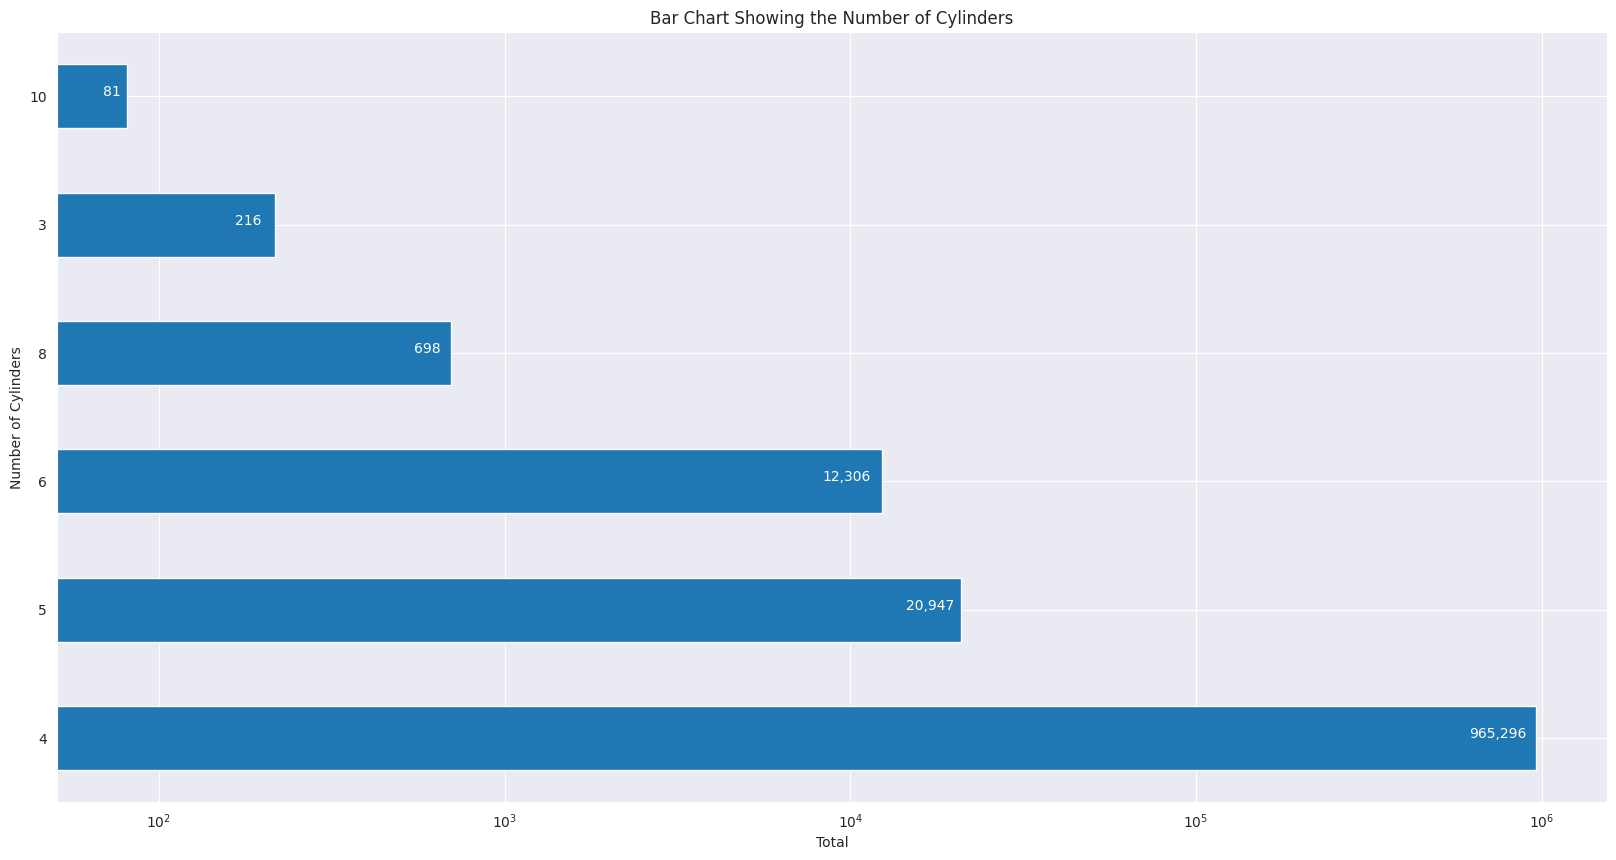

In [73]:
df_cylinders["Total"].plot(kind="barh", figsize=(20, 10))

plt.title("Bar Chart Showing the Number of Cylinders")
plt.xlabel("Total")
plt.ylabel("Number of Cylinders")

plt.xscale("log")

for index, value in enumerate(df_cylinders.index):
    total = df_cylinders.loc[value, "Total"]
    label = format(total, ',')

    dist = {0: 350000, 1: 6500, 2: 4000, 3: 150, 4: 50, 5: 12}
    plt.annotate(
        label,
        xy=(total - dist[index], index),
        color="white"
    )


### Cubic Capacity of Insured Vehicles Distribution

Here I was able to detect alot of outliers when I used a box plot to plot the data. I then used the IQR method to remove the outliers and plot the data again. The box plot below shows the cubic capacity of the cars after removing the outliers

In [74]:
df["CubicCapacity"].describe()

count    999544.000000
mean       2466.743461
std         442.801023
min           0.000000
25%        2237.000000
50%        2694.000000
75%        2694.000000
max       12880.000000
Name: CubicCapacity, dtype: float64

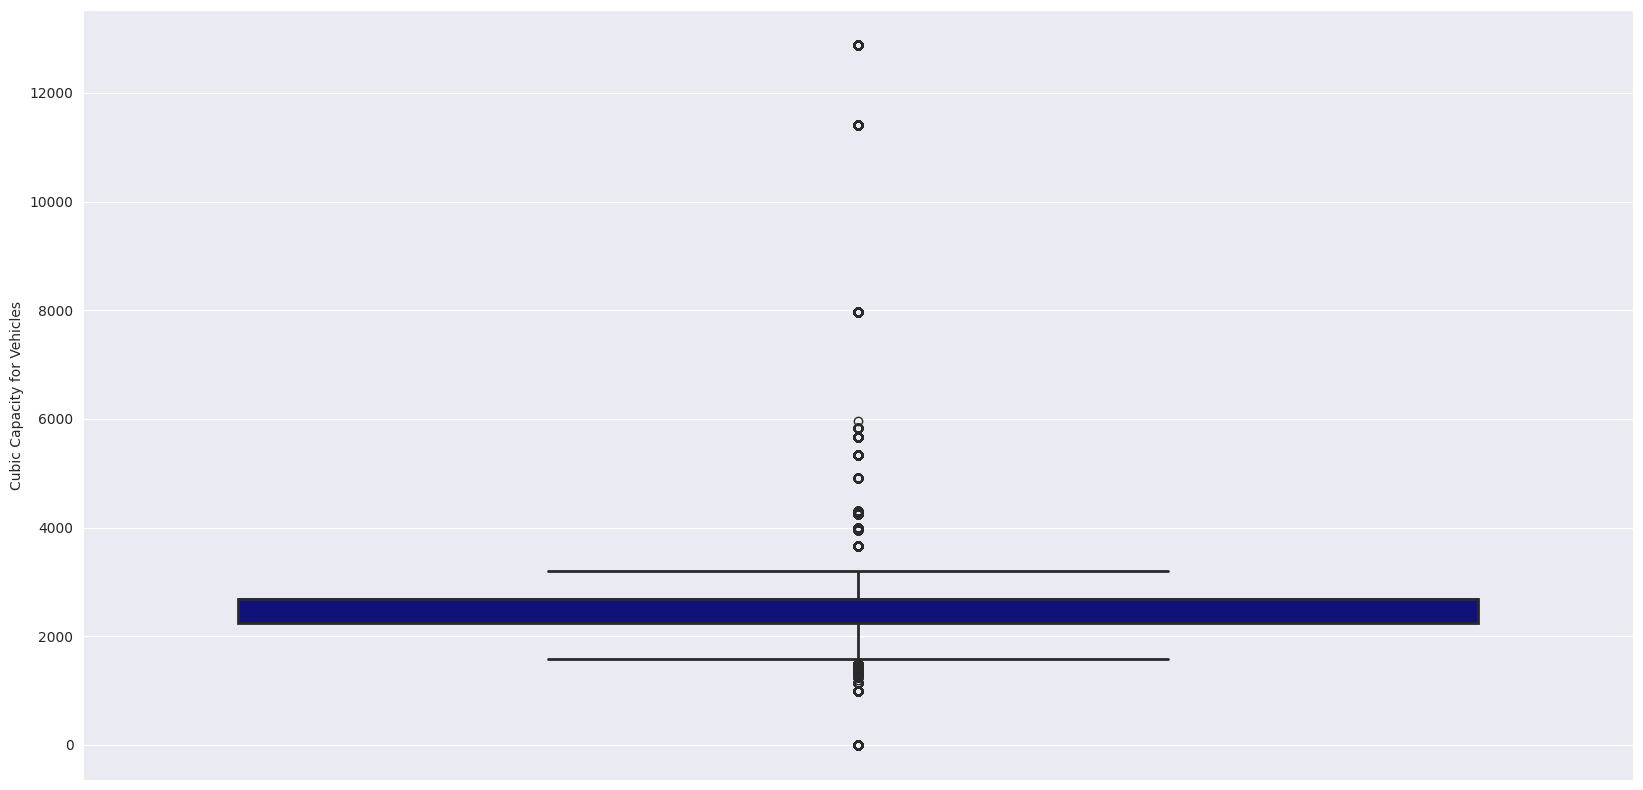

In [75]:
plot_box_plot(df, 'CubicCapacity', 'Cubic Capacity for Vehicles')

In [76]:
df_no_outlier = remove_outliers_iqr(df, 'CubicCapacity')
df_no_outlier["CubicCapacity"].describe()

count    942605.000000
mean       2523.135579
std         247.111467
min        1584.000000
25%        2237.000000
50%        2694.000000
75%        2694.000000
max        3198.000000
Name: CubicCapacity, dtype: float64

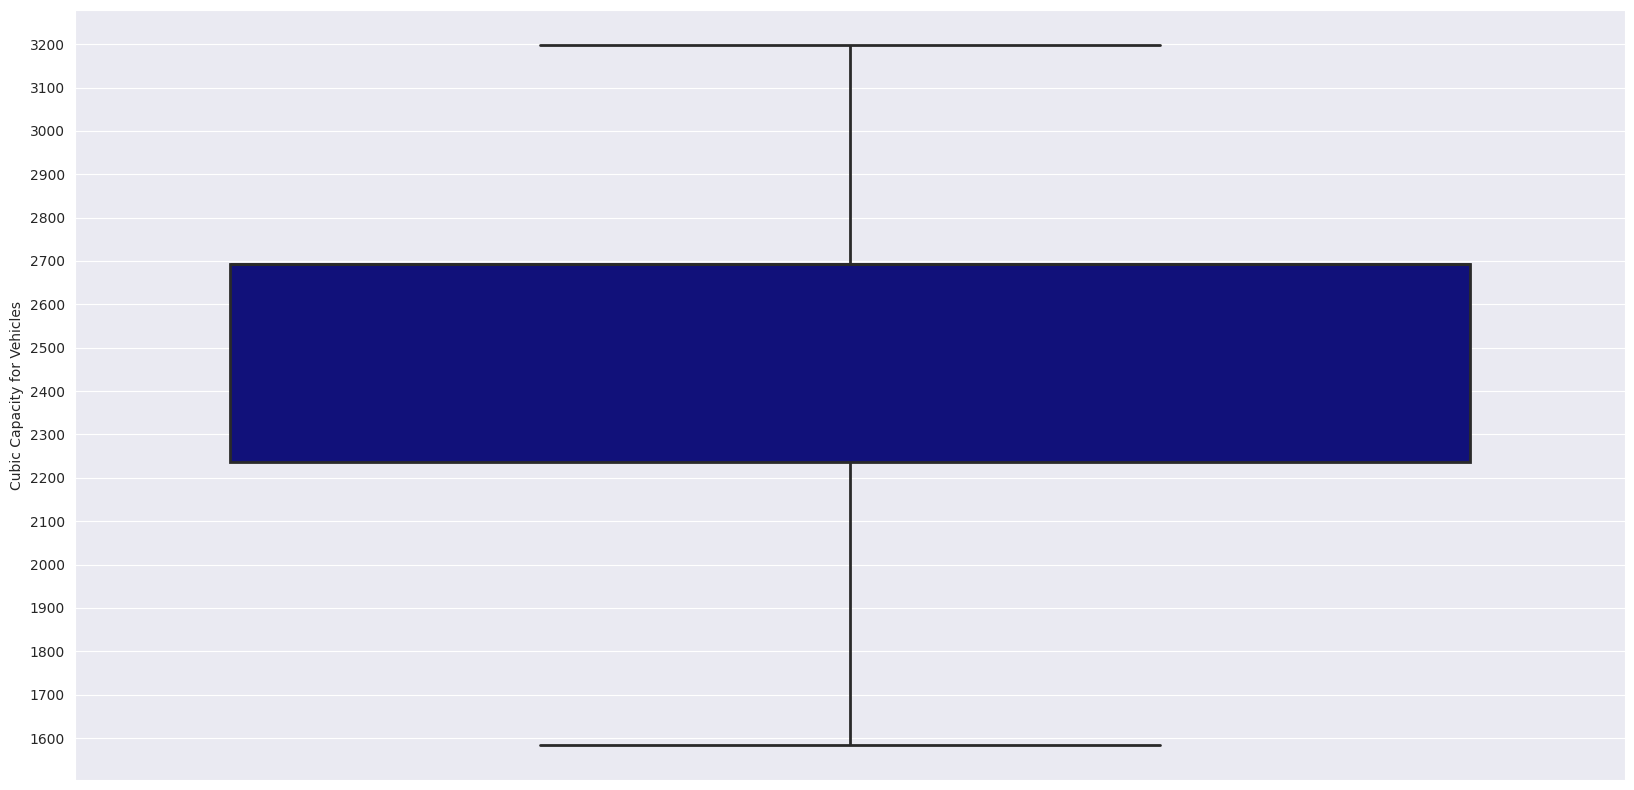

In [77]:
plot_box_plot(df_no_outlier, "CubicCapacity", "Cubic Capacity for Vehicles", outliers=False)

Text(0, 0.5, 'Number of Cars')

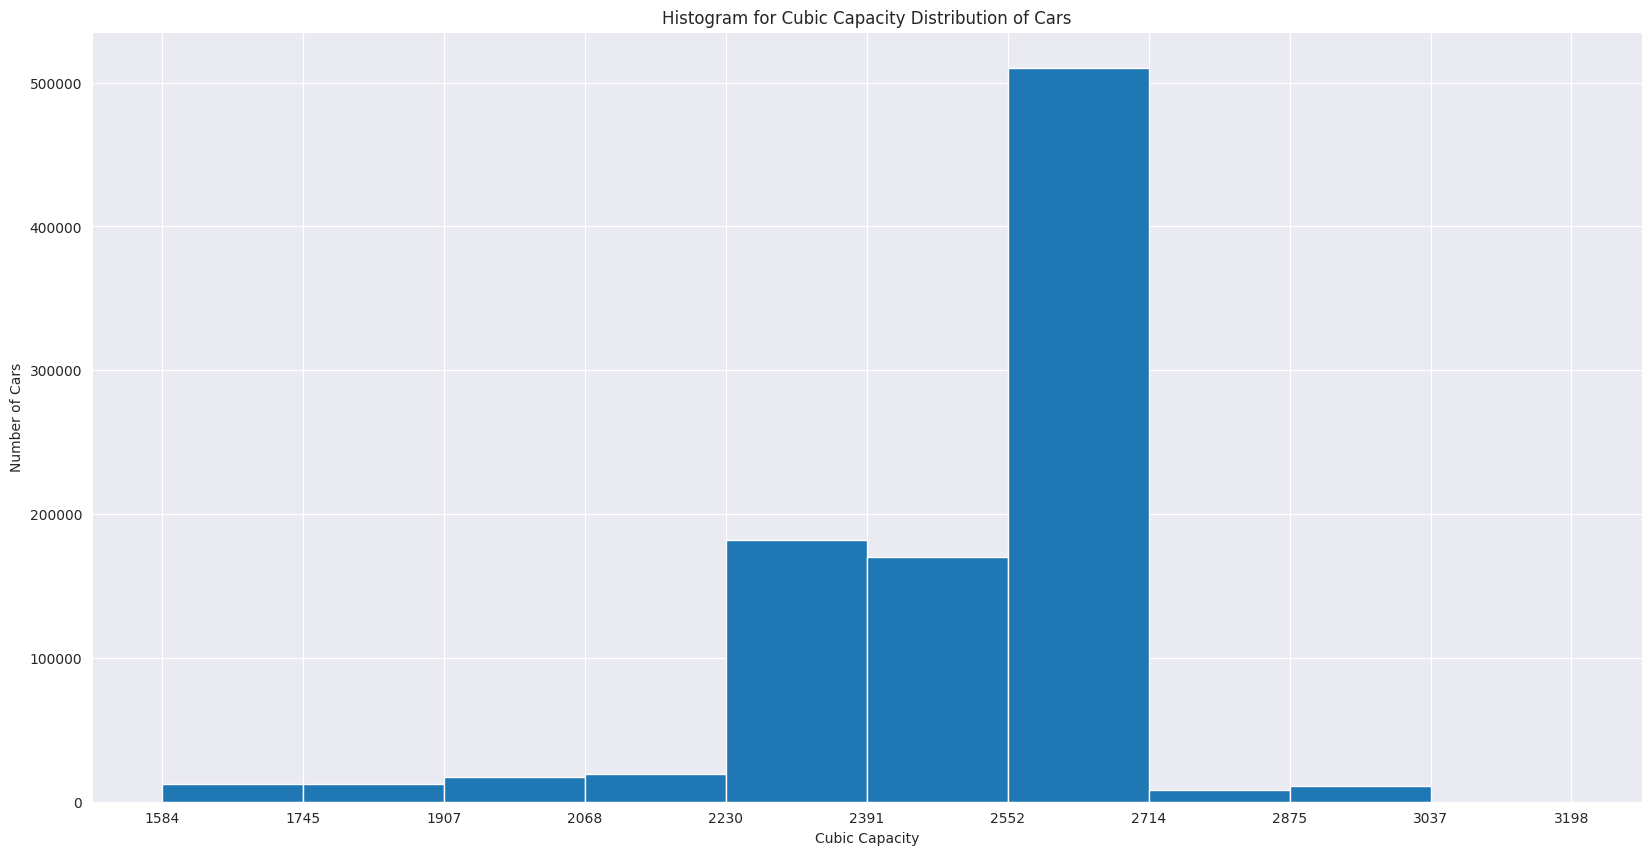

In [78]:
_, bin_edges = np.histogram(df_no_outlier["CubicCapacity"], bins=10)
df_no_outlier["CubicCapacity"].plot(kind='hist', bins=10, xticks=bin_edges, figsize=(20,10))

plt.title("Histogram for Cubic Capacity Distribution of Cars")
plt.xlabel("Cubic Capacity")
plt.ylabel("Number of Cars")


### Kilowatts of Insured Vehicles Distribution

In [79]:
df_no_outlier["Kilowatts"].describe()

count    942605.000000
mean         98.351265
std          18.089290
min          58.000000
25%          75.000000
50%         111.000000
75%         111.000000
max         200.000000
Name: Kilowatts, dtype: float64

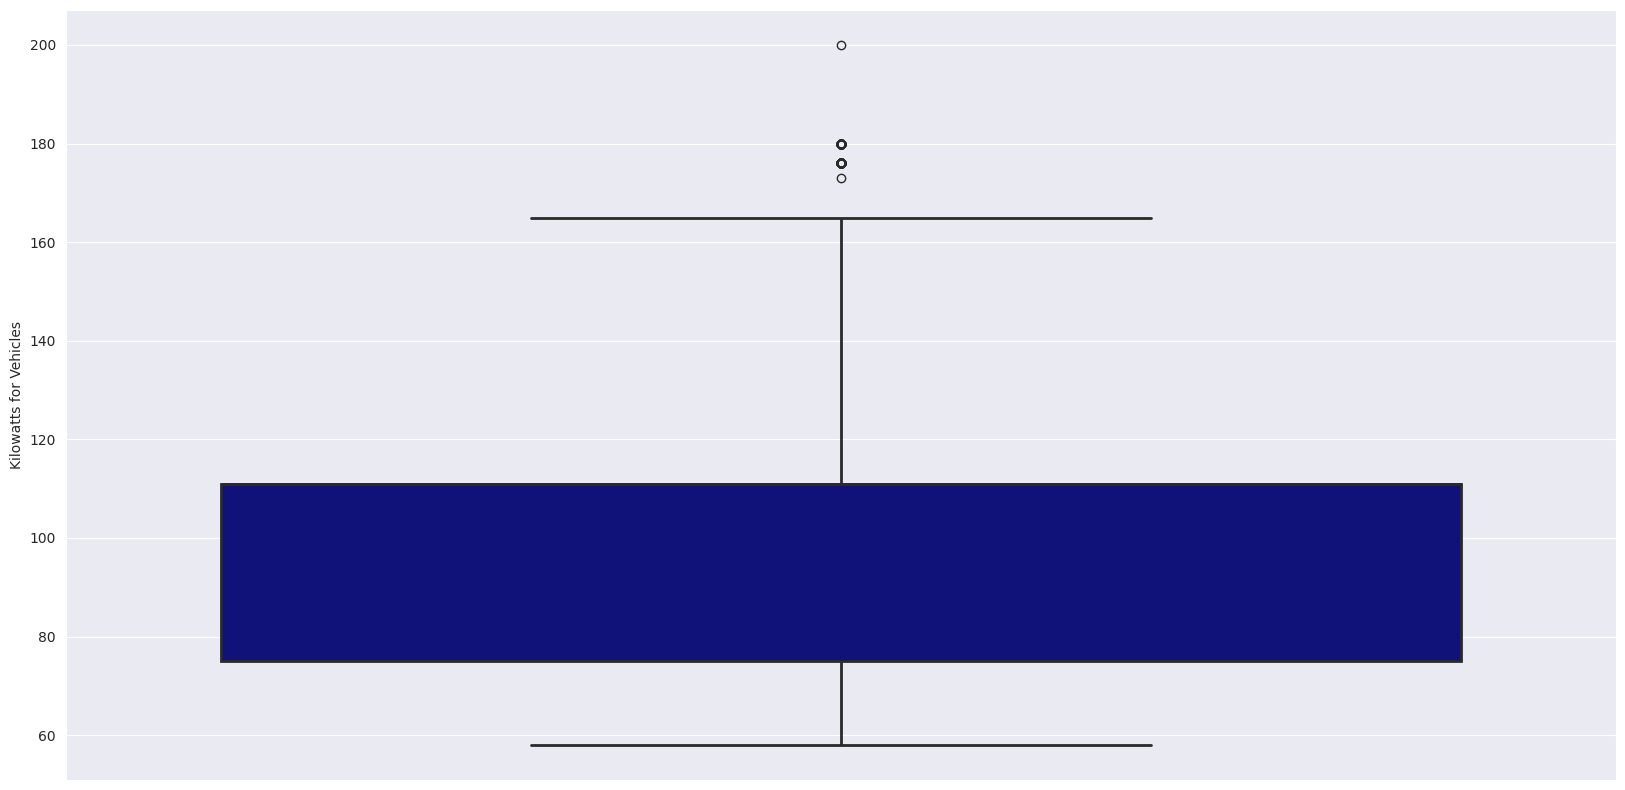

In [80]:
plot_box_plot(df_no_outlier, 'Kilowatts', 'Kilowatts for Vehicles')

In [81]:
df_no_outlier = remove_outliers_iqr(df_no_outlier, 'Kilowatts')
df_no_outlier["Kilowatts"].describe()

count    942404.000000
mean         98.334295
std          18.053818
min          58.000000
25%          75.000000
50%         111.000000
75%         111.000000
max         165.000000
Name: Kilowatts, dtype: float64

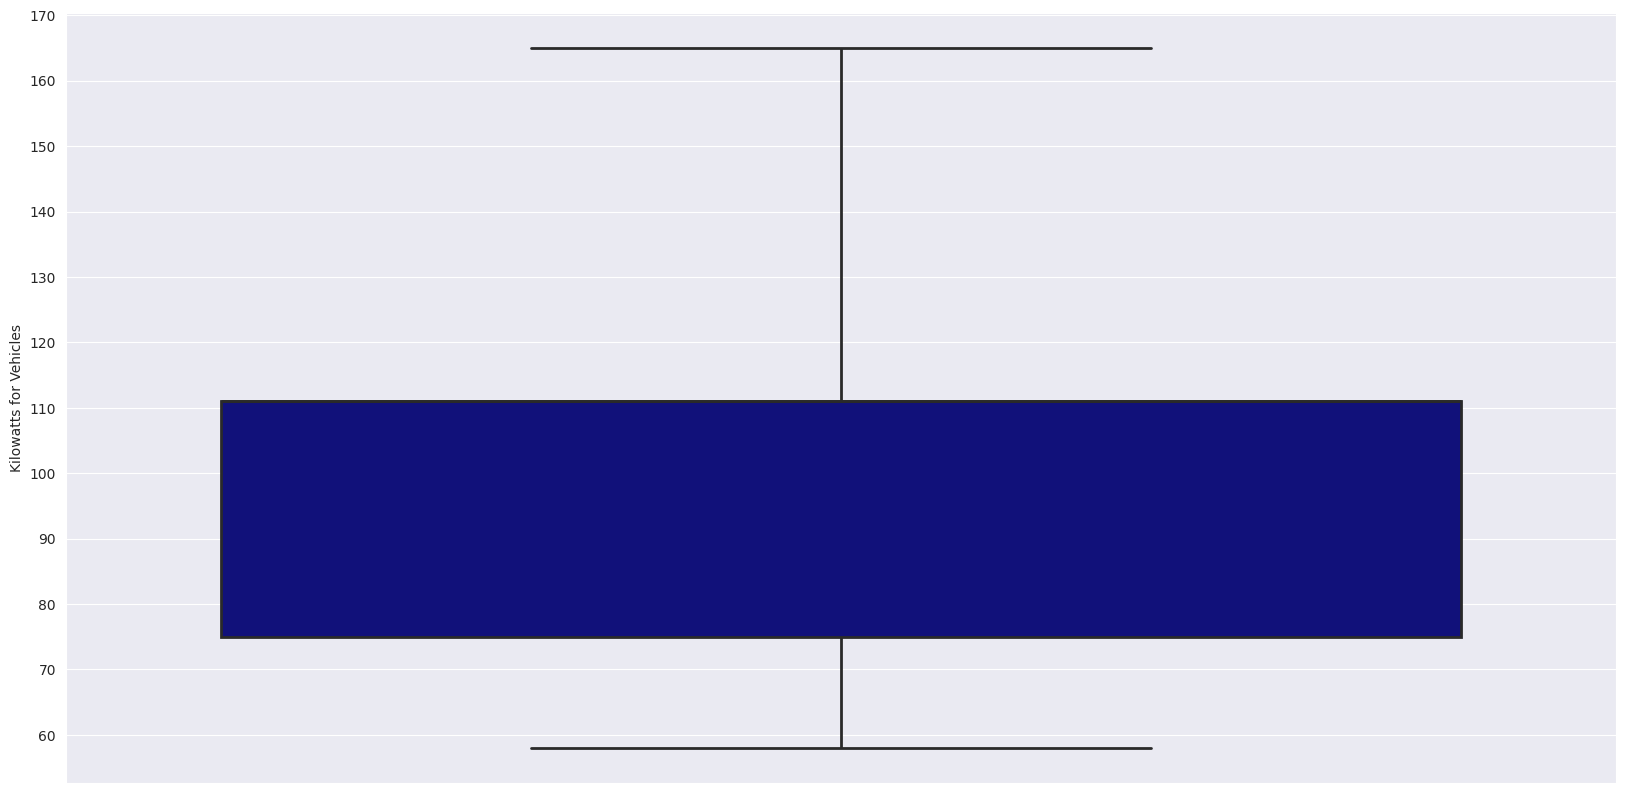

In [82]:
plot_box_plot(df_no_outlier, 'Kilowatts', 'Kilowatts for Vehicles', outliers=False, step=10) 

Text(0, 0.5, 'Number of Cars')

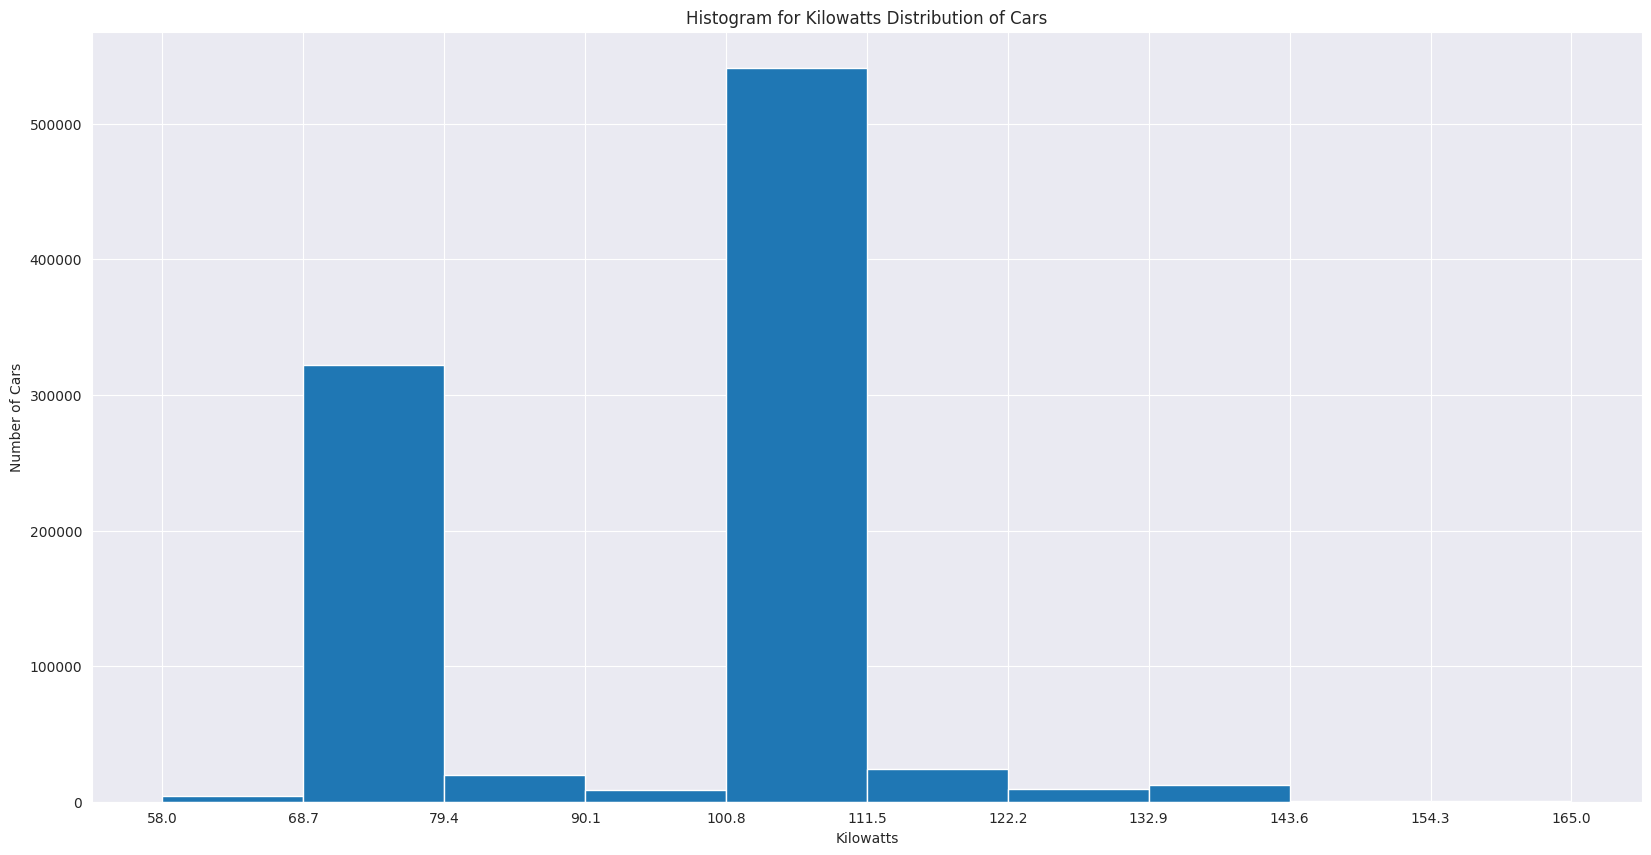

In [83]:
_, bin_edges = np.histogram(df_no_outlier["Kilowatts"], bins=10)
df_no_outlier["Kilowatts"].plot(kind='hist', bins=10, xticks=bin_edges, figsize=(20,10))

plt.title("Histogram for Kilowatts Distribution of Cars")
plt.xlabel("Kilowatts")
plt.ylabel("Number of Cars")

### Number of Doors in Insured Vehicles Distribution

In [84]:
df_no_outlier["NumberOfDoors"].describe()

count    942404.000000
mean          4.044471
std           0.255712
min           4.000000
25%           4.000000
50%           4.000000
75%           4.000000
max           6.000000
Name: NumberOfDoors, dtype: float64

In [85]:
df_no_outlier["NumberOfDoors"].value_counts()

NumberOfDoors
4    911282
5     20334
6     10788
Name: count, dtype: int64

In [86]:
df_num_doors = df_no_outlier["NumberOfDoors"].value_counts().reset_index()
df_num_doors.columns = ["NumberOfDoors", "Total"]
df_num_doors.set_index("NumberOfDoors", inplace=True)

df_num_doors.head(10)

,Total
NumberOfDoors,
4,911282
5,20334
6,10788


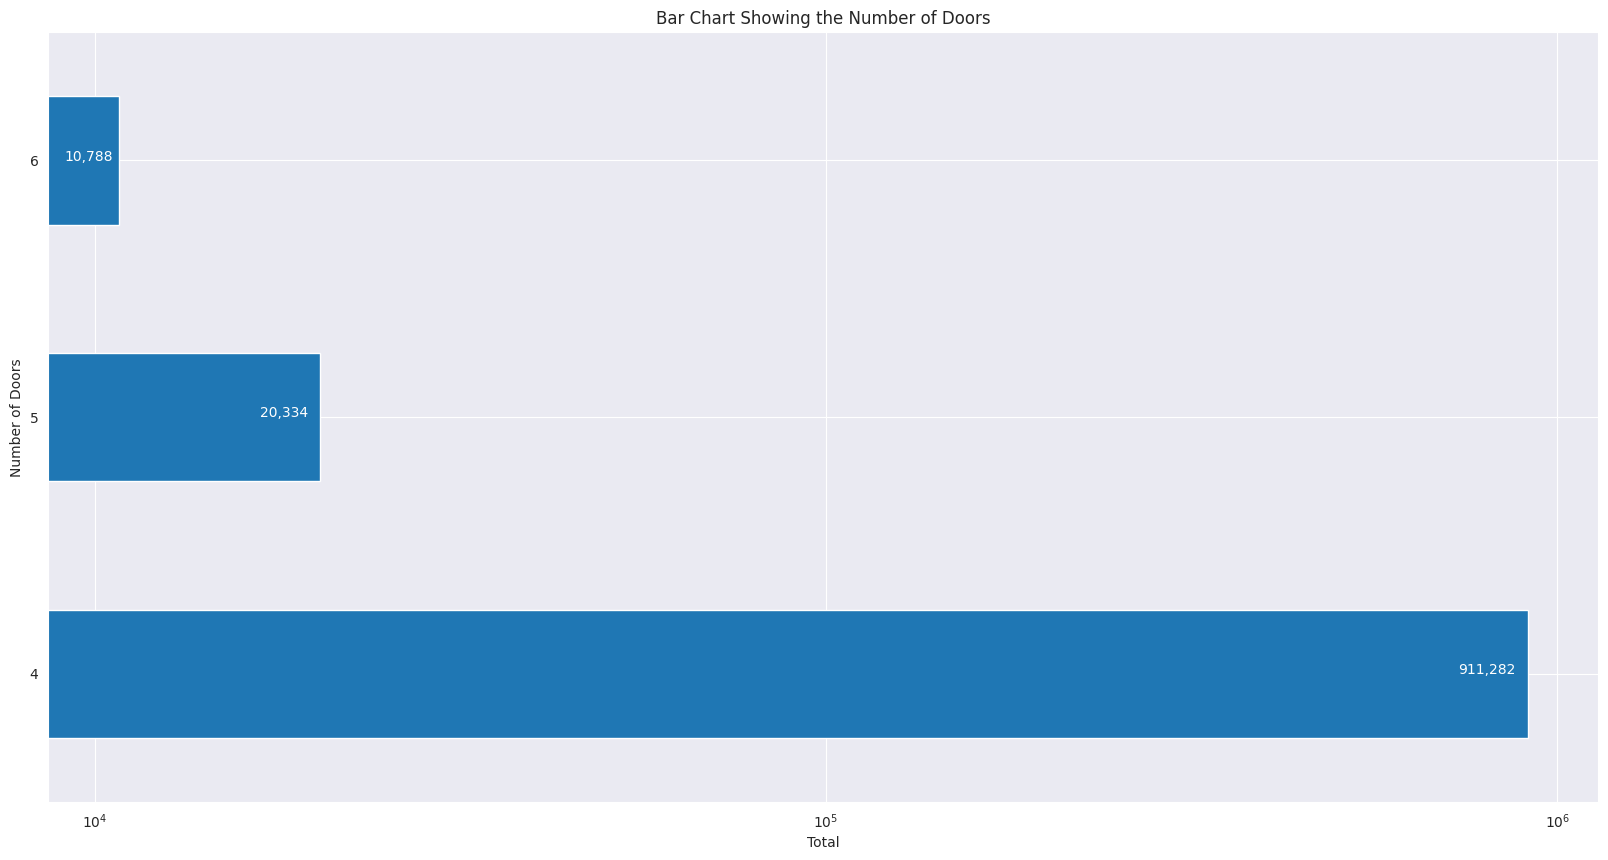

In [87]:
df_num_doors["Total"].plot(kind="barh", figsize=(20, 10))

plt.title("Bar Chart Showing the Number of Doors")
plt.xlabel("Total")
plt.ylabel("Number of Doors")

plt.xscale("log")

for index, value in enumerate(df_num_doors.index):
    total = df_num_doors.loc[value, "Total"]
    label = format(total, ',')

    dist = {0: 180000, 1: 3500, 2: 1700}
    plt.annotate(
        label,
        xy=(total - dist[index], index),
        color="white"
    )


### Gender Distribution of Customers 

In [88]:
df_no_outlier["Gender"].describe()

count            942404
unique                3
top       Not specified
freq             902050
Name: Gender, dtype: object

In [89]:
df_gender = df_no_outlier["Gender"].value_counts().reset_index()
df_gender.columns = ["Gender", "Total"]
df_gender.set_index("Gender", inplace=True)

df_gender

,Total
Gender,
Not specified,902050
Male,35698
Female,4656


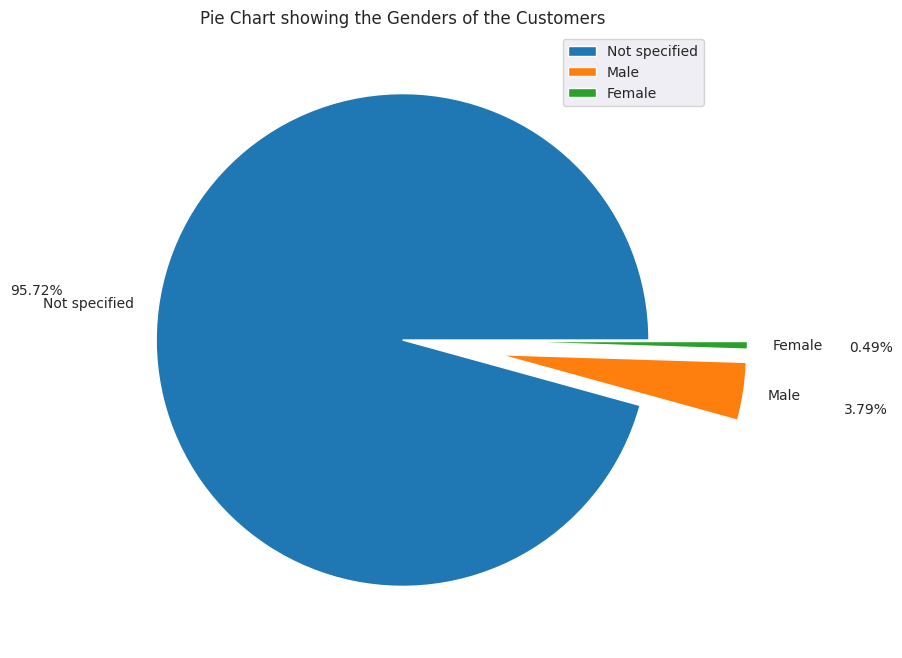

In [90]:
df_gender.plot(kind='pie', figsize=(10, 8), x='Gender', y='Total', autopct="%.2f%%", pctdistance=1.5, explode=[0.0, 0.4, 0.4])

plt.title("Pie Chart showing the Genders of the Customers")
plt.ylabel("")

plt.show()

### Total Premium of Insured Cars Distribution

In [91]:
df_no_outlier["TotalPremium"].describe()

count    942404.000000
mean         62.685710
std         157.747352
min        -782.576754
25%           0.000000
50%           2.296140
75%          21.929825
max        1890.948684
Name: TotalPremium, dtype: float64

In [92]:
df_no_outlier = df_no_outlier[df_no_outlier["TotalPremium"] >= 0]
df_no_outlier["TotalPremium"].describe()

count    942130.000000
mean         62.733734
std         157.710585
min           0.000000
25%           0.000000
50%           2.297544
75%          21.929825
max        1890.948684
Name: TotalPremium, dtype: float64

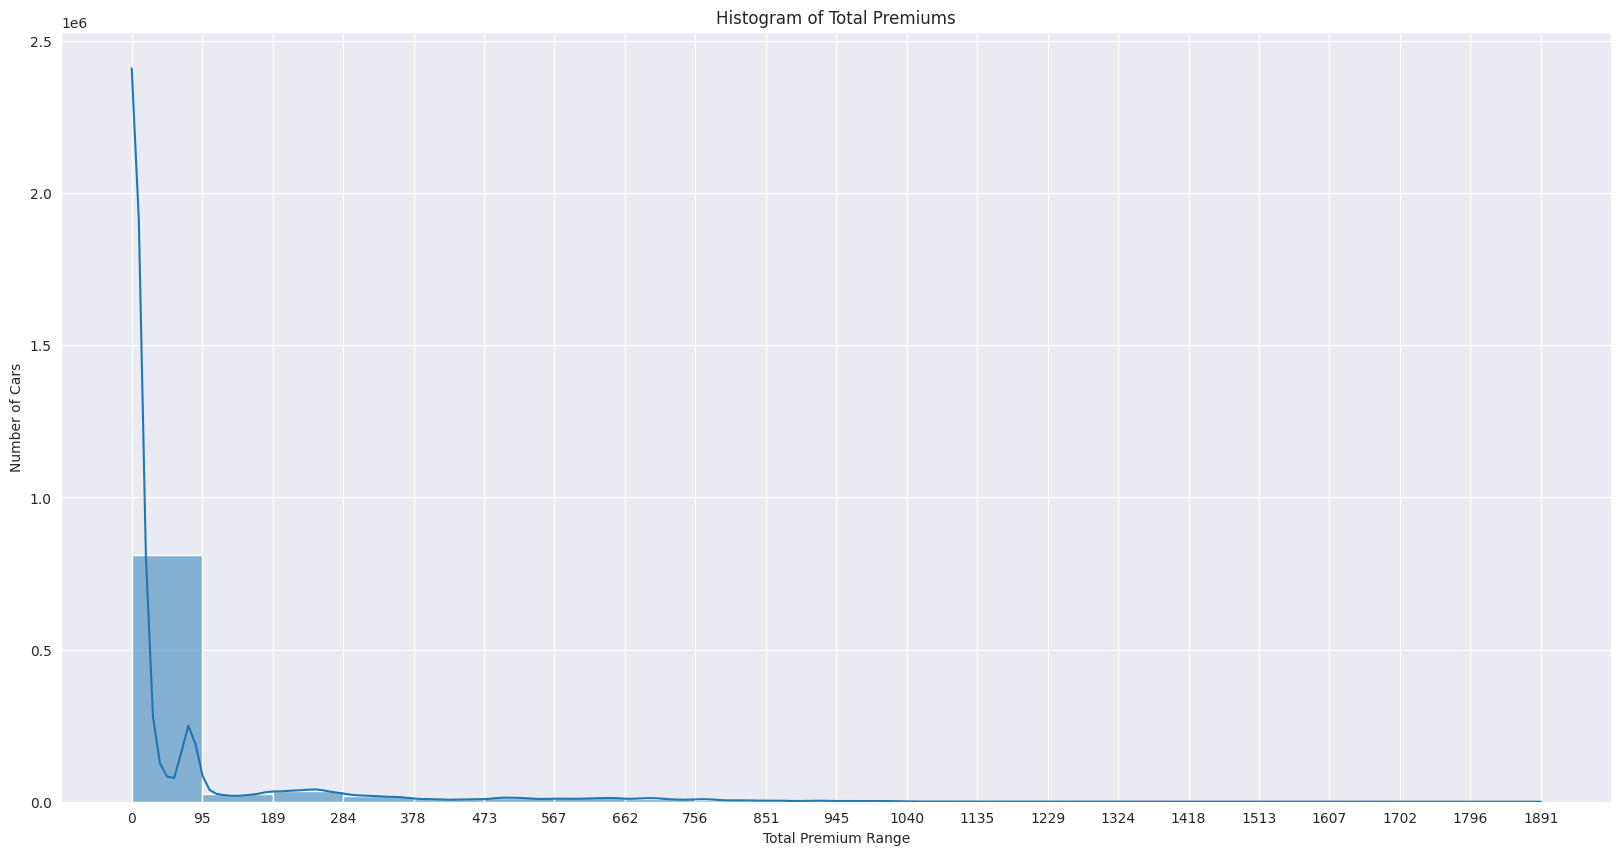

In [93]:
count, bin_edges = np.histogram(df_no_outlier["TotalPremium"], bins=20)

# df_no_outlier["TotalPremium"].plot(kind='hist', figsize=(20, 10), xticks=bin_edges, bins=20)
plt.figure(figsize=(20,10))
sns.histplot(df_no_outlier, bins=20, x='TotalPremium', kde=True)

plt.title("Histogram of Total Premiums")
plt.xlabel("Total Premium Range")
plt.ylabel("Number of Cars")

plt.xticks(ticks=bin_edges)
plt.show()

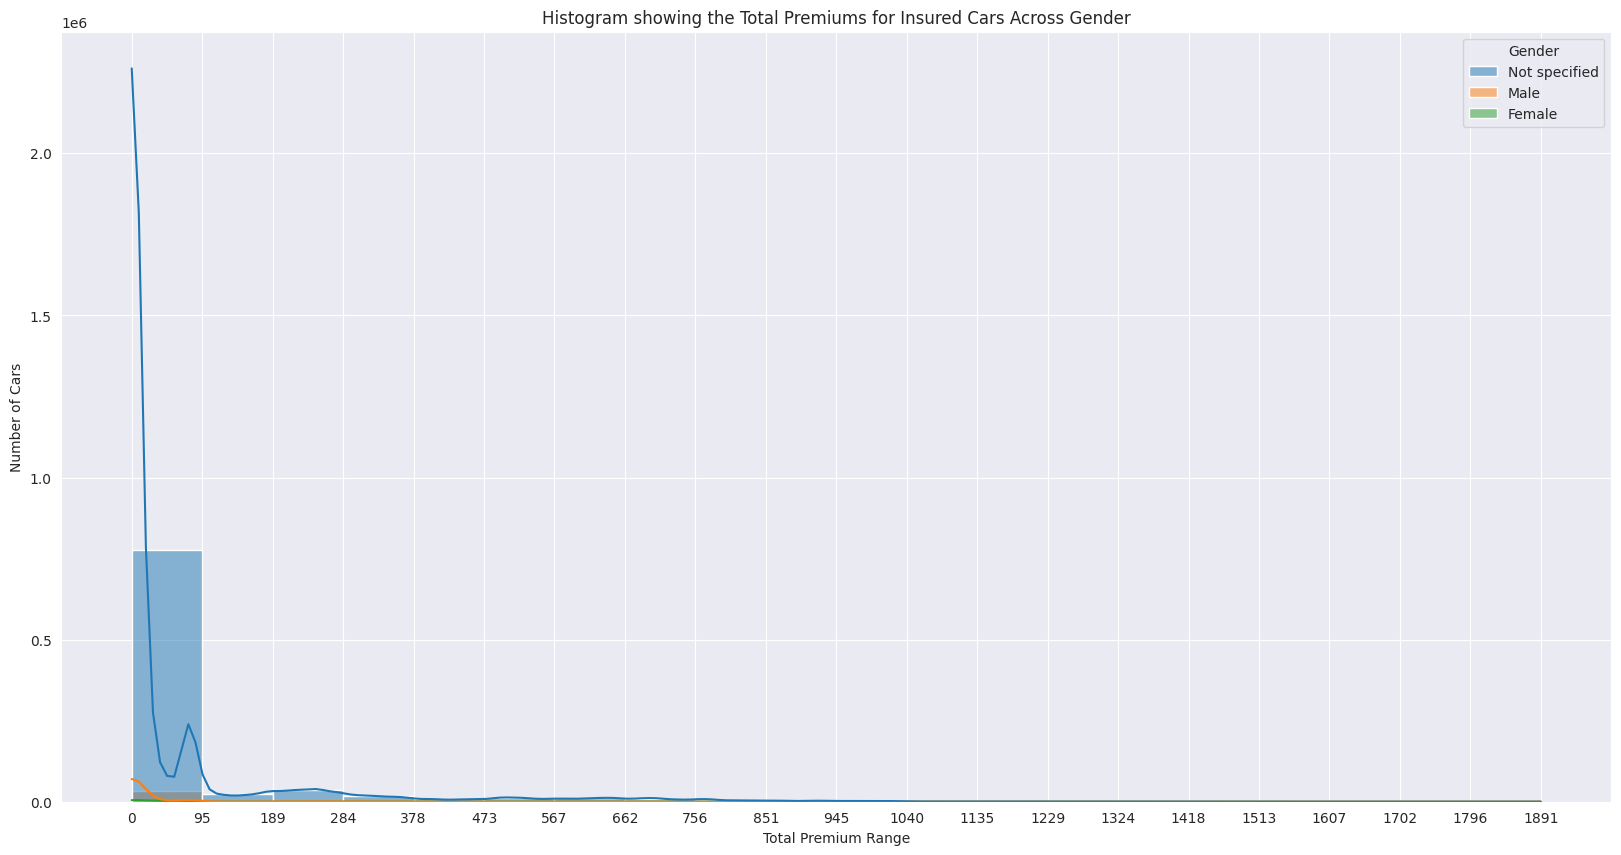

In [94]:
_, bin_edges = np.histogram(df_no_outlier["TotalPremium"], bins=20)

plt.figure(figsize=(20,10))
sns.histplot(df_no_outlier, bins=20, x='TotalPremium', kde=True, hue='Gender')

plt.title("Histogram showing the Total Premiums for Insured Cars Across Gender")
plt.xlabel("Total Premium Range")
plt.ylabel("Number of Cars")

plt.xticks(ticks=bin_edges)
plt.show()

### Total Claims of Insured Cars Distribution

In [95]:
df_no_outlier.describe()

,TransactionMonth,Cylinders,CubicCapacity,Kilowatts,NumberOfDoors,CustomValueEstimate,CapitalOutstanding,SumInsured,CalculatedPremiumPerTerm,TotalPremium,TotalClaims
count,942130,942130.000000,942130.000000,942130.000000,942130.000000,9.421300e+05,9.421300e+05,9.421300e+05,942130.000000,942130.000000,942130.000000
mean,2015-03-04 08:28:32.232493824,4.044481,2523.203722,98.332571,4.044481,5.163908e+04,6.417258e+04,6.044515e+05,117.419125,62.733734,64.419274
min,2013-10-01 00:00:00,4.000000,1584.000000,58.000000,4.000000,0.000000e+00,-2.000000e+00,1.000000e-02,0.000000,0.000000,-12002.412281
25%,2015-01-01 00:00:00,4.000000,2237.000000,75.000000,4.000000,0.000000e+00,0.000000e+00,5.000000e+03,3.370800,0.000000,0.000000
50%,2015-04-01 00:00:00,4.000000,2694.000000,111.000000,4.000000,0.000000e+00,0.000000e+00,7.500000e+03,8.597100,2.297544,0.000000
75%,2015-06-01 00:00:00,4.000000,2694.000000,111.000000,4.000000,0.000000e+00,0.000000e+00,2.510000e+05,90.000000,21.929825,0.000000
max,2015-08-01 00:00:00,6.000000,3198.000000,165.000000,6.000000,2.655000e+07,2.857000e+07,1.000000e+07,3051.821100,1890.948684,393092.105263
std,NaN,0.255742,247.094698,18.055448,0.255742,2.891376e+05,5.305990e+05,1.507300e+06,220.348706,157.710585,2373.131757


In [96]:
df_no_outlier = df_no_outlier[df_no_outlier["TotalClaims"] >= 0]
df_no_outlier["TotalClaims"].describe()

count    942125.000000
mean         64.439419
std        2373.097947
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      393092.105263
Name: TotalClaims, dtype: float64

In [ ]:
_, bin_edges = np.histogram(df_no_outlier["TotalClaims"], bins=20)

# df_no_outlier["TotalClaims"].plot(kind='hist', figsize=(20, 10), xticks=bin_edges, bins=20)
plt.figure(figsize=(20,10))
sns.histplot(df_no_outlier, bins=20, x='TotalClaims', kde=True)

plt.title("Histogram of Total Claims")
plt.xlabel("Total Claim Range")
plt.ylabel("Number of Cars")

plt.xticks(ticks=bin_edges)
plt.show()


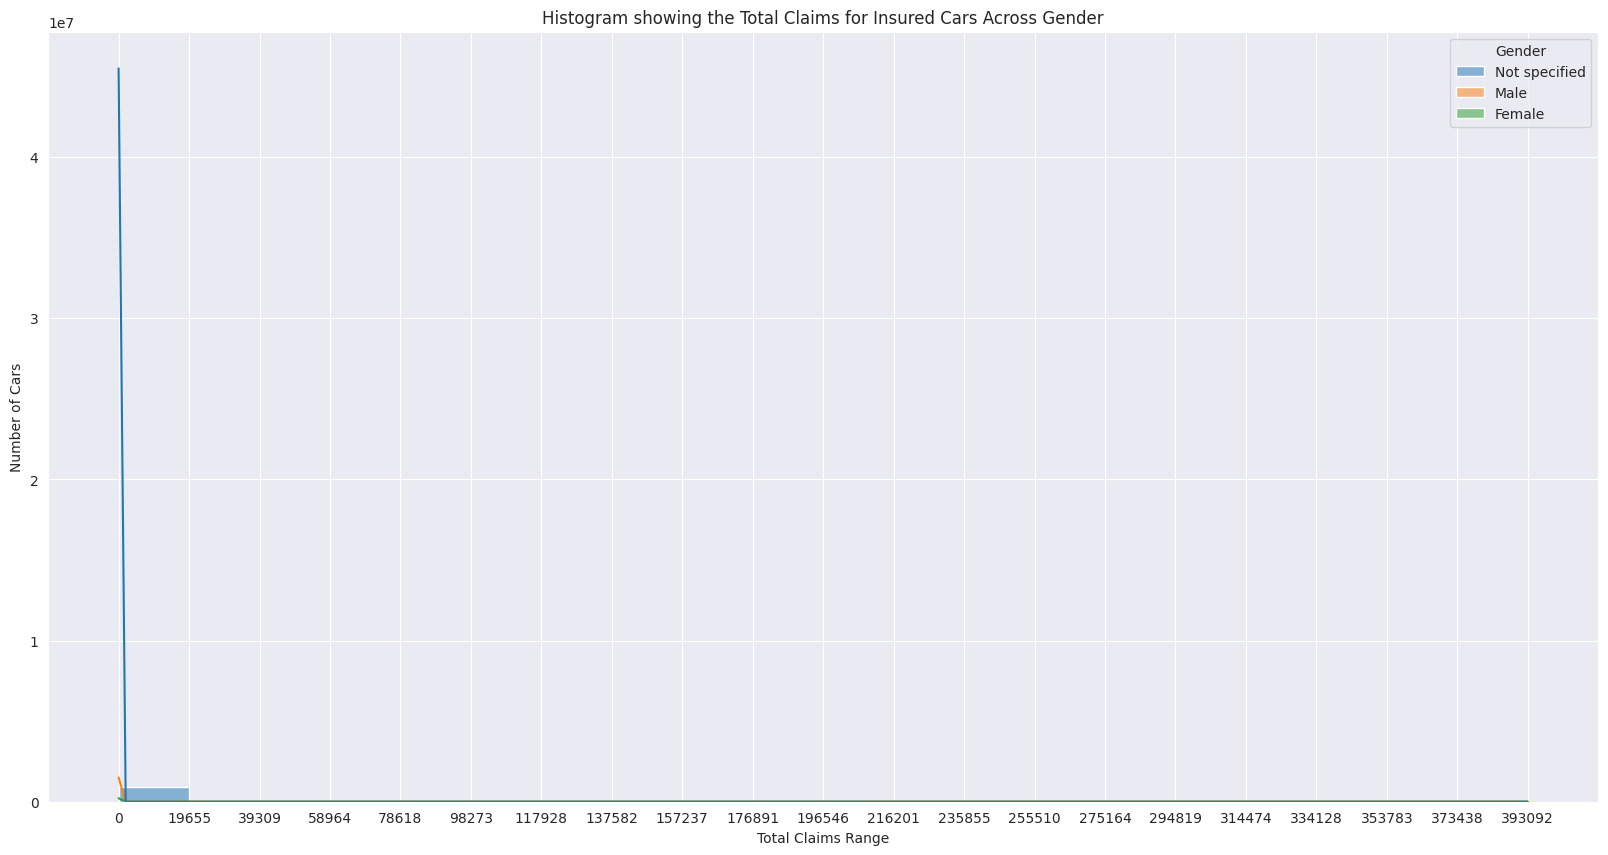

In [49]:
_, bin_edges = np.histogram(df_no_outlier["TotalClaims"], bins=20)

plt.figure(figsize=(20,10))
sns.histplot(df_no_outlier, bins=20, x='TotalClaims', kde=True, hue='Gender')

plt.title("Histogram showing the Total Claims for Insured Cars Across Gender")
plt.xlabel("Total Claims Range")
plt.ylabel("Number of Cars")

plt.xticks(ticks=bin_edges)
plt.show()
